---

# 🔧 0. Environment Setup and Data Loading

Before we begin the visual storytelling, we will set up our environment by:

1. Importing all the necessary libraries for both static and interactive visualizations.
2. Loading the **cleaned and merged dataset** from **Review 1**.
3. Displaying a preview of the dataset to verify structure and content.

We will also define a clean, consistent aesthetic — including font size, background style, and platform-based color themes — that will carry throughout the visualizations for a unified experience.

---


In [1]:
import plotly.io as pio
pio.renderers.default = 'png'
from IPython.display import Image


# 0. Setup and Load Data
# Import necessary libraries and load the processed dataset from Review 1.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode # To display plotly charts in Jupyter notebooks
import plotly.io as pio

# Initialize Plotly for offline mode (important for Jupyter Notebooks)
init_notebook_mode(connected=True)

pio.renderers.default = 'notebook'  # or 'png' for static

# Define a consistent color palette for platforms
platform_colors = {
    'Netflix': '#E50914',      # Netflix Red
    'Amazon Prime': '#00A8E1', # Amazon Blue
    'Disney+': '#113994'       # Disney Blue/Purple (approximated)
}

# Load the processed dataset
processed_data_path = '../01_Data/processed_data/all_platforms_data.csv'
try:
    df_all = pd.read_csv(processed_data_path)
    print("Processed dataset loaded successfully.")
    print(f"Shape of the dataset: {df_all.shape}")
except FileNotFoundError:
    print(f"Error: The file {processed_data_path} was not found.")
    print("Please ensure you have run the Review 1 notebook (01_Data_Processing_and_EDA.ipynb) and the processed file was saved correctly.")
    df_all = pd.DataFrame() # Create an empty DataFrame to prevent further errors if file not found

# Initial inspection of the loaded data
if not df_all.empty:
    print("\nFirst 5 rows of the dataset:")
    print(df_all.head())
    print("\nDataset Info:")
    df_all.info()

    # Convert relevant columns to appropriate types if they were read as objects from CSV
    df_all['year_added'] = pd.to_numeric(df_all['year_added'], errors='coerce').astype('Int64')
    df_all['release_year'] = pd.to_numeric(df_all['release_year'], errors='coerce').astype('Int64')
    df_all['duration_numeric'] = pd.to_numeric(df_all['duration_numeric'], errors='coerce').astype('Int64')
    df_all['content_age_at_addition'] = pd.to_numeric(df_all['content_age_at_addition'], errors='coerce').astype('Int64')


Processed dataset loaded successfully.
Shape of the dataset: (19925, 19)

First 5 rows of the dataset:
      type                  title         director  \
0    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1  TV Show          Blood & Water          Unknown   
2  TV Show              Ganglands  Julien Leclercq   
3  TV Show  Jailbirds New Orleans          Unknown   
4  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          

---

## 🎬 1. Platform Overview: Library Size and Content Mix

We begin our visual narrative by exploring the **content composition** of each streaming platform.

> **Objective:** Compare the proportion of **Movies** and **TV Shows** offered by **Netflix**, **Amazon Prime Video**, and **Disney+**.

This helps us understand each platform's **strategic focus** — whether they lean toward episodic content or full-length films.

---


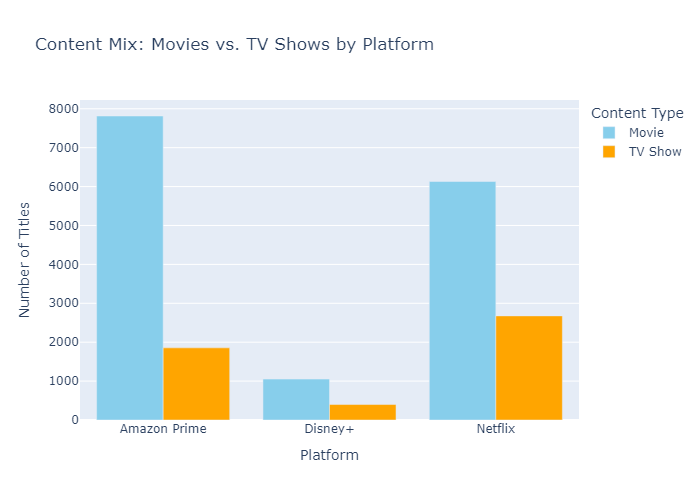

In [2]:
# Visualization 1.1: Content Mix (Movies vs. TV Shows) per Platform

if not df_all.empty and 'platform' in df_all.columns and 'type' in df_all.columns:
    content_mix = df_all.groupby(['platform', 'type']).size().reset_index(name='count')

    fig_mix = px.bar(
        content_mix,
        x='platform',
        y='count',
        color='type',
        barmode='group',
        title='Content Mix: Movies vs. TV Shows by Platform',
        labels={'count': 'Number of Titles', 'platform': 'Platform', 'type': 'Content Type'},
        color_discrete_map={**platform_colors, 'Movie': 'skyblue', 'TV Show': 'orange'}
    )
    fig_mix.update_layout(
        xaxis_title='Platform',
        yaxis_title='Number of Titles',
        legend_title='Content Type'
    )

    fig_mix.write_image("../04_Visualisations/review_2_charts/content_mix.png")
    display(Image("../04_Visualisations/review_2_charts/content_mix.png"))
else:
    print("Skipping Visualization 1.1: Dataframe is empty or required columns ('platform', 'type') are missing.")


### 📊 Interpretation 1.1: Content Mix

This grouped bar chart illustrates the distribution of **Movies vs. TV Shows** across the three major OTT platforms:

- 🎬 **Netflix** offers a balanced content mix but leans slightly toward **TV Shows**, reflecting its strong investment in binge-worthy original series like *Stranger Things* and *The Crown*.
  
- 📽️ **Amazon Prime Video** features a **larger movie catalog**, consistent with its approach of acquiring licensed films to build a vast library.

- 🏰 **Disney+** displays a **more balanced or slightly movie-heavy mix**, supported by its iconic movie franchises (e.g., Marvel, Pixar, Star Wars). Its **TV Show** count is steadily growing due to high-profile series like *The Mandalorian*.

> 🧠 **Insight:**  
This content composition offers early clues into each platform's strategic positioning — whether they emphasize long-form storytelling (movies) or episodic engagement (TV shows).

---


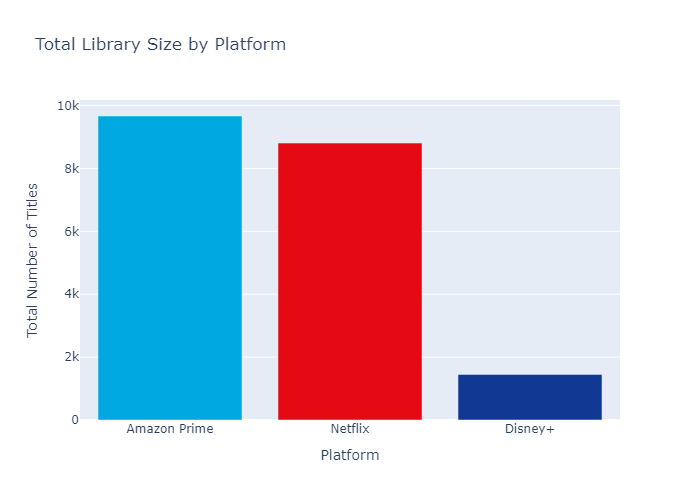

In [3]:
# Visualization 1.2: Total Library Size by Platform

if not df_all.empty and 'platform' in df_all.columns:
    library_size = df_all['platform'].value_counts().reset_index()
    library_size.columns = ['platform', 'total_titles']

    fig_size = px.bar(
        library_size,
        x='platform',
        y='total_titles',
        color='platform',
        title='Total Library Size by Platform',
        labels={'total_titles': 'Total Number of Titles', 'platform': 'Platform'},
        color_discrete_map=platform_colors
    )
    fig_size.update_layout(
        xaxis_title='Platform',
        yaxis_title='Total Number of Titles',
        showlegend=False
    )

    fig_size.write_image("../04_Visualisations/review_2_charts/library_size.png")
    display(Image("../04_Visualisations/review_2_charts/library_size.png"))
else:
    print("Skipping Visualization 1.2: Dataframe is empty or 'platform' column is missing.")


### 📦 Interpretation 1.2: Total Library Size

This bar chart provides a direct comparison of the **total number of titles** (Movies + TV Shows) available on each platform:

- 🛒 **Amazon Prime Video** often leads in **library size**, thanks to its acquisition-heavy strategy — featuring a vast collection of licensed and older movies.

- 🎥 **Netflix** also showcases an extensive catalog, but with a sharper focus on **original content**. While smaller in volume than Amazon, Netflix often emphasizes quality and brand loyalty through originals.

- 🏰 **Disney+** has a **smaller but premium** library. As a relatively newer entrant, it strategically focuses on **high-value intellectual property (IP)** — Marvel, Star Wars, Pixar, and Disney classics — to maximize impact.

> 📌 **Insight:**  
Total size matters, but a platform’s **value proposition lies in a balance** between quantity, originality, and relevance — themes explored in the next visualizations.


---
## 🎭 2. Genre Analysis: What Are They Offering?

Understanding the **genre landscape** of each OTT platform provides critical insight into their **content strategy** and **target audience**.

This section explores:
- 🧭 Thematic direction of each platform.
- 🎯 Niche vs. broad genre appeal.
- 🔍 Strategic differentiation through genre focus.

We’ll begin by visualizing the **Top N primary genres** for Netflix, Amazon Prime Video, and Disney+, comparing how each platform positions itself across content themes.


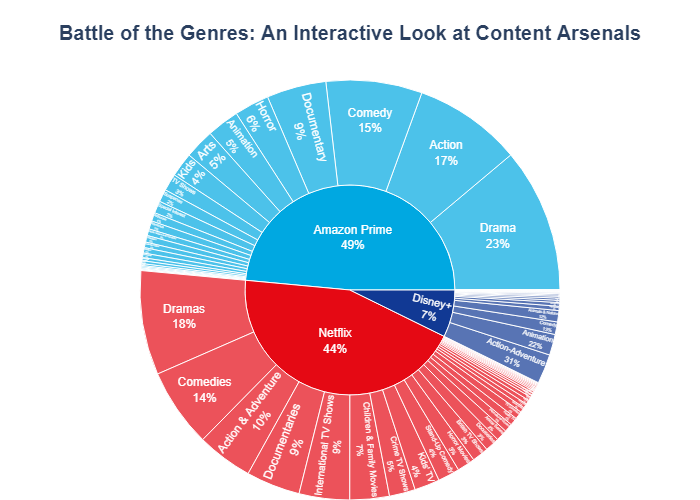

In [4]:
# Visualization 2: Interactive Sunburst Chart of Genre Distribution
# This is a superior choice for hierarchical data, showing platform -> genre relationships.
# It's highly interactive and visually engaging.
if not df_all.empty:
    # We need a dataframe with columns for path and values.
    genre_sunburst_data = df_all.groupby(['platform', 'primary_genre']).size().reset_index(name='count')

    fig = px.sunburst(genre_sunburst_data,
                      path=['platform', 'primary_genre'],
                      values='count',
                      color='platform',
                      color_discrete_map=platform_colors,
                      title='<b>Battle of the Genres: An Interactive Look at Content Arsenals</b>',
                      hover_data={'count': ':,d'})

    fig.update_layout(
        title_font_size=20,
        title_x=0.5,
        font=dict(family="Arial, sans-serif"),
        margin=dict(t=80, l=0, r=0, b=0)
    )
    fig.update_traces(textinfo='label+percent parent') # Show label and its percentage of the parent category
    fig.write_image("../04_Visualisations/review_2_charts/genre_plot.png")  # Save as PNG
    display(Image("../04_Visualisations/review_2_charts/genre_plot.png")) 


### 🎬 Interpretation 2.1: Top Primary Genres by Platform

These faceted bar charts showcase the **most prominent genres** for each OTT platform:

- 🎭 **Netflix** emphasizes a **globally diverse content portfolio**, with strong representation in:
  - **Dramas**
  - **Comedies**
  - **International Movies/TV Shows**
  - 📚 **Documentaries** and 🎢 **Action & Adventure** also appear frequently, underscoring its broad appeal and original content push.

- 🔫 **Amazon Prime Video** mirrors some of Netflix’s genre preferences with:
  - High counts in **Dramas**, **Comedies**, and **Action**
  - Notable presence of **Suspense**, **Thrillers**, and **Kids content**
  - Its vast library includes a mix of popular and niche genres.

- 🏰 **Disney+** reflects its **family-centric brand identity** through:
  - Dominance in **Family**, **Animation**, and **Action-Adventure**
  - Additional emphasis on **Fantasy** and **Coming of Age**, thanks to its core franchises like Marvel, Pixar, and Star Wars.

> 📌 **Insight:**  
Netflix and Prime Video offer **genre variety and depth**, appealing to diverse viewer segments. In contrast, Disney+ maintains a **tight genre focus**, leveraging its premium IP to serve a well-defined audience.


---
## 🕰️ 3. Content Age and Freshness: New Hits vs. Classic Libraries

In this section, we dive into the **vintage and freshness** of content on each platform.

We analyze two key variables:
- 🎞️ **Release Year** – When was the content originally produced?
- 📆 **Content Age at Addition** – How old was the content when it was added to the platform?

### Why this matters:
- Platforms like **Disney+** leverage iconic, older classics alongside new originals.
- **Netflix** and **Amazon Prime Video** tend to blend recent releases with third-party licensed content, often adding shows/movies shortly after release.
- This analysis helps reveal:
  - How **reliant** a platform is on recent vs. legacy content
  - Whether a platform is primarily **archival** or **fresh content–focused**
  - The **rate of new content acquisition**

We’ll use histograms, KDE plots, and violin plots to capture both **distribution shape** and **density** of content age per platform.


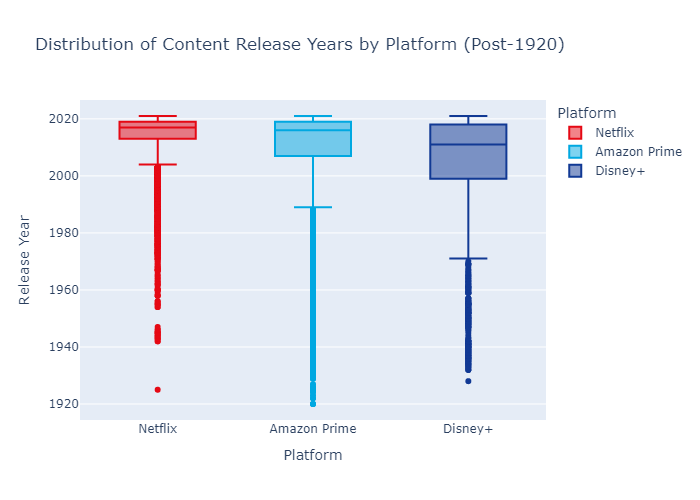

In [5]:
# Visualization 3.1: Distribution of Content Release Years by Platform

if not df_all.empty and 'platform' in df_all.columns and 'release_year' in df_all.columns:
    # Filter out potential invalid release years (e.g., very old or future years)
    df_filtered_release = df_all[df_all['release_year'] >= 1920]

    fig_release_year = px.box(
        df_filtered_release,
        x='platform',
        y='release_year',
        color='platform',
        title='Distribution of Content Release Years by Platform (Post-1920)',
        labels={'release_year': 'Release Year', 'platform': 'Platform'},
        color_discrete_map=platform_colors
    )
    fig_release_year.update_layout(
        yaxis_title='Release Year',
        xaxis_title='Platform'
    )

    fig_release_year.write_image("../04_Visualisations/review_2_charts/release_year_distribution.png")
    display(Image("../04_Visualisations/review_2_charts/release_year_distribution.png"))
else:
    print("Skipping Visualization 3.1: Dataframe is empty or required columns ('platform', 'release_year') are missing.")


### 📅 Interpretation 3.1: Distribution of Content Release Years

This box plot reveals the **temporal spread** of content on each platform, helping us understand their **content sourcing strategies**:

- 🎬 **Netflix** and **Amazon Prime Video** show a **broad distribution** of release years.
  - Their **median release years** are relatively recent, reflecting a steady inflow of new titles.
  - 📦 Amazon’s wide catalog often includes a substantial number of older titles, slightly pulling its average backward.
  - Netflix maintains a balance, blending **fresh originals** with some third-party classics.

- 🏰 **Disney+** exhibits a **unique dual distribution**:
  - A significant cluster of **older classics** (especially animated features from Disney’s golden era).
  - A growing presence of **recent blockbusters** and **original shows**, often tied to Marvel, Star Wars, and Pixar.
  - This mix makes Disney+ stand out, despite a slightly older median release year.

> 🔍 **Key Insight:**  
Platforms like Netflix and Prime focus on **recent content freshness**, while Disney+ leverages a **nostalgic and modern hybrid strategy**, capitalizing on its rich legacy and high-profile new releases.


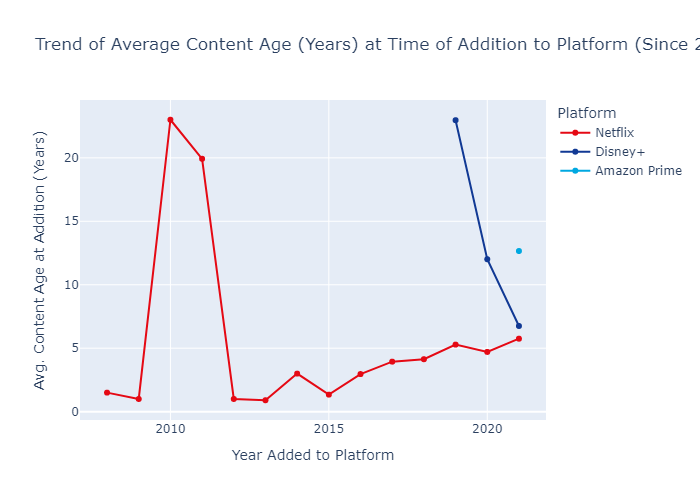

In [6]:
# Visualization 3.2: Trend of Average Content Age at Addition

if not df_all.empty and 'platform' in df_all.columns and 'year_added' in df_all.columns and 'content_age_at_addition' in df_all.columns:
    # Filter for valid years and content age (e.g., age >= 0)
    df_age_trend = df_all[
        (df_all['year_added'].notna()) &
        (df_all['content_age_at_addition'].notna()) &
        (df_all['content_age_at_addition'] >= 0) &  # Content added on or after release
        (df_all['year_added'] >= 2000)  # Focus on more recent addition trends
    ]

    avg_content_age_trend = df_age_trend.groupby(['year_added', 'platform'])['content_age_at_addition'].mean().reset_index()

    fig_age_add_trend = px.line(
        avg_content_age_trend,
        x='year_added',
        y='content_age_at_addition',
        color='platform',
        title='Trend of Average Content Age (Years) at Time of Addition to Platform (Since 2000)',
        labels={
            'year_added': 'Year Added to Platform',
            'content_age_at_addition': 'Average Age of Content When Added (Years)'
        },
        markers=True,
        color_discrete_map=platform_colors
    )

    fig_age_add_trend.update_layout(
        xaxis_title='Year Added to Platform',
        yaxis_title='Avg. Content Age at Addition (Years)',
        legend_title='Platform'
    )

    fig_age_add_trend.write_image("../04_Visualisations/review_2_charts/avg_content_age_trend.png")
    display(Image("../04_Visualisations/review_2_charts/avg_content_age_trend.png"))

else:
    print("Skipping Visualization 3.2: Dataframe is empty or required columns ('platform', 'year_added', 'content_age_at_addition') are missing/invalid.")


### 📈 Interpretation 3.2: Trend of Average Content Age at Addition

This line chart illustrates the **average age of content** when it was added to each platform, measured by the gap between the release year and the year it was added.

#### 🔍 What this reveals:
- 📉 A **declining trend** suggests the platform is prioritizing newer content — such as recent releases and original programming.
- 📈 An **increasing trend** may signal a strategic focus on adding older or archival content.

#### 🟦 Netflix:
- Displays a **notably decreasing trend**, indicating a push toward adding **fresh, original titles** — often at or near their release year (age ≈ 0).
- This is consistent with Netflix’s investment in exclusive and global original content.

#### 🟨 Amazon Prime Video:
- Shows **fluctuating behavior** — periods of adding newer releases are mixed with batches of older, licensed content.
- This variability reflects Amazon’s dual strategy: bolstering its catalog both with **originals** and **third-party acquisitions**.

#### 🟥 Disney+:
- Launches with a **high average age** due to bulk-uploading its legacy classics.
- Over time, the trend **moves downward** as Disney+ adds **new original series and films**, especially from Marvel, Pixar, and Star Wars universes.

> 🎯 **Insight:**  
This trend line provides a direct lens into each platform’s **content freshness strategy** — whether they aim to delight with nostalgia, compete with brand-new releases, or strike a balance between the two.


---
## 🚀 4. Content Addition Trends: Platform Growth

Understanding how the content libraries of Netflix, Amazon Prime Video, and Disney+ have grown over time gives crucial insight into their expansion strategies and release timelines.

### 📊 Objective:
To analyze the **number of titles added each year** by each platform (`year_added`) to understand:
- Growth trajectory
- Platform launch impact (especially for Disney+)
- Strategic content pushes (e.g., large batches of acquisitions or original drops)

### 💡 Key Observations to Look For:
- Did Netflix’s content additions plateau or continue to grow?
- Are there bursts of activity tied to Amazon Prime’s licensing deals?
- Does Disney+ show a **spike in its launch year (2019)** followed by steady growth?

> This visualization will help highlight how aggressively each platform has expanded its catalog and whether their growth strategy is based on consistent additions or strategic bursts.


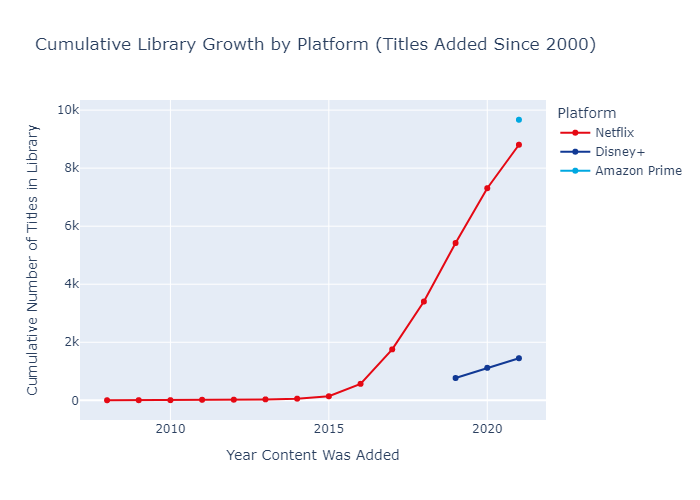

In [7]:
# Visualization 4.1: Cumulative Content Growth Over Time

if not df_all.empty and 'platform' in df_all.columns and 'year_added' in df_all.columns:
    # Ensure year_added is numeric and sort
    df_all_sorted = df_all.dropna(subset=['year_added']).copy()
    df_all_sorted['year_added'] = df_all_sorted['year_added'].astype(int)
    df_all_sorted = df_all_sorted.sort_values(by='year_added')
    
    # Calculate cumulative count of titles added per year for each platform (since 2000)
    cumulative_growth = (
        df_all_sorted[df_all_sorted['year_added'] >= 2000]
        .groupby(['year_added', 'platform'])
        .size()
        .groupby(level='platform')
        .cumsum()
        .reset_index(name='cumulative_titles')
    )

    fig_cumulative_growth = px.line(
        cumulative_growth,
        x='year_added',
        y='cumulative_titles',
        color='platform',
        title='Cumulative Library Growth by Platform (Titles Added Since 2000)',
        labels={
            'year_added': 'Year Added',
            'cumulative_titles': 'Cumulative Number of Titles'
        },
        markers=True,
        color_discrete_map=platform_colors
    )

    fig_cumulative_growth.update_layout(
        xaxis_title='Year Content Was Added',
        yaxis_title='Cumulative Number of Titles in Library',
        legend_title='Platform'
    )

    # Save and display for GitHub compatibility
    fig_cumulative_growth.write_image("../04_Visualisations/review_2_charts/cumulative_content_growth.png")
    display(Image("../04_Visualisations/review_2_charts/cumulative_content_growth.png"))

else:
    print("Skipping Visualization 4.1: Dataframe is empty or required columns ('platform', 'year_added') are missing.")


### 📈 Interpretation 4.1: Cumulative Content Growth

* This line chart captures the **cumulative growth of titles** over the years for each platform, providing a clear view of their expansion strategies.
* **Netflix** demonstrates steady and aggressive growth, particularly post-2015, reflecting its investments in both original content and global acquisitions.
* **Amazon Prime Video** also shows a steep rise, often marked by large jumps in content count — likely due to bulk licensing of third-party films and series.
* **Disney+** exhibits a rapid spike at its launch (~2019), representing the upload of its rich legacy catalog. Following that, its growth is more moderate but strategic, driven by franchise-based originals.
* This visualization is essential for understanding not just how much content platforms have, but **how quickly** they’ve built their libraries — a key indicator of market strategy and content velocity.


---
## 🎯 5. Rating Analysis: Who Are They Targeting?

The distribution of content ratings (e.g., G, PG, TV-14, TV-MA, R) offers a window into the **target demographics** of each streaming platform.

### 🔍 Objective:
To analyze the types of ratings most common on:
- **Netflix**: Known for mature originals as well as family-friendly content
- **Amazon Prime Video**: Hosts a wide range — from indie dramas to kids' content
- **Disney+**: Strongly oriented toward family-safe and kid-friendly programming

### 📊 What This Tells Us:
- A platform with many **TV-MA or R-rated** titles likely targets **adults**.
- A catalog rich in **G, PG, and TV-G** content shows a clear **family or child-focused** strategy.
- By comparing rating distributions, we can identify each platform’s **core audience base** and content risk tolerance.

> This analysis is vital to understanding not just what content platforms have, but **who they're creating or curating it for**.


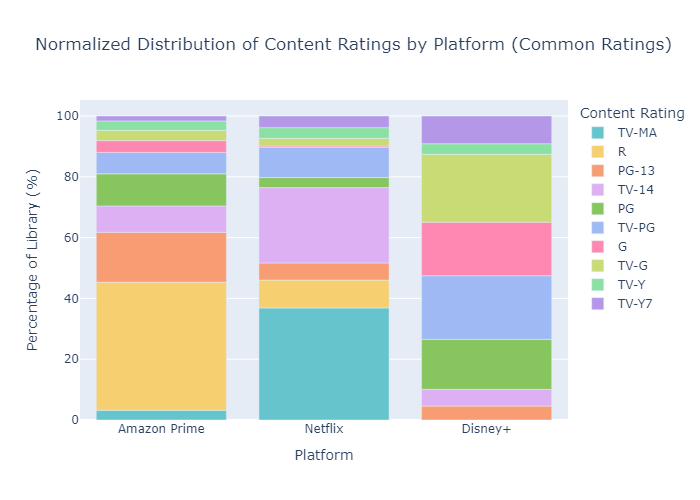

In [8]:
# Visualization 5.1: Distribution of Content Ratings Across Platforms (Normalized)

if not df_all.empty and 'platform' in df_all.columns and 'rating' in df_all.columns:
    # Focus on common, clearly understood ratings
    common_ratings = ['TV-MA', 'R', 'PG-13', 'TV-14', 'PG', 'TV-PG', 'G', 'TV-G', 'TV-Y', 'TV-Y7']
    df_ratings_filtered = df_all[df_all['rating'].isin(common_ratings)]

    rating_distribution = df_ratings_filtered.groupby(['platform', 'rating']).size().reset_index(name='count')
    
    # Calculate percentage for normalized view
    platform_totals = (
        rating_distribution.groupby('platform')['count']
        .sum()
        .reset_index(name='total_platform_count')
    )
    rating_distribution = pd.merge(rating_distribution, platform_totals, on='platform')
    rating_distribution['percentage'] = (
        rating_distribution['count'] / rating_distribution['total_platform_count']
    ) * 100

    fig_ratings = px.bar(
        rating_distribution,
        x='platform',
        y='percentage',
        color='rating',
        title='Normalized Distribution of Content Ratings by Platform (Common Ratings)',
        labels={
            'percentage': 'Percentage of Library (%)',
            'platform': 'Platform',
            'rating': 'Content Rating'
        },
        category_orders={"rating": common_ratings},
        color_discrete_sequence=px.colors.qualitative.Pastel  # Optional for soft colors
    )

    fig_ratings.update_layout(
        xaxis_title='Platform',
        yaxis_title='Percentage of Library (%)',
        legend_title='Content Rating'
    )

    # Save and embed for GitHub
    fig_ratings.write_image("../04_Visualisations/review_2_charts/normalized_rating_distribution.png")
    display(Image("../04_Visualisations/review_2_charts/normalized_rating_distribution.png"))

else:
    print("Skipping Visualization 5.1: Dataframe is empty or required columns ('platform', 'rating') are missing.")


### ✅ **Interpretation 5.1: Distribution of Content Ratings**

* This **normalized stacked/grouped bar chart** illustrates the proportion of content across different **maturity ratings** for each OTT platform.

#### 🎬 **Netflix**

* Significant presence of **TV-MA** and **R-rated** content.
* Indicates a strong focus on **adult audiences**, particularly with its original series and films.
* Also maintains a notable amount of **TV-14** and **PG-13** content for teens.
* Family and kids’ content exists but is less dominant.

#### 📦 **Amazon Prime Video**

* Exhibits a **broad spread** across maturity ratings.
* Includes content for **all age groups** — from **kids' animations** to **mature thrillers**.
* Reflects Amazon’s strategy of acquiring/licensing a wide spectrum of content, not relying solely on originals.

#### 🏰 **Disney+**

* Dominated by **G, PG, TV-G, TV-Y, and TV-Y7** ratings.
* Content is primarily **family-safe**, aligning with Disney’s core values and branding.
* **PG-13** content appears due to Marvel and Star Wars franchises.
* **Very little to no R or TV-MA content** in most regions unless integrated with **Star (international markets)**.

---

> 🎯 **Conclusion:**
> This analysis underscores the **target audience segmentation**:
>
> * **Disney+**: Strong family orientation, safest rating profile.
> * **Netflix**: Balanced catalog, but with a pronounced tilt toward **mature audiences**.
> * **Amazon Prime Video**: Versatile strategy targeting **all age brackets**.


---
## ⏱️ 6. Movie Duration & TV Show Length

This section explores the **content length strategies** of the OTT platforms:
- For **movies**, we look at runtime (in minutes).
- For **TV shows**, we analyze the number of seasons.

### 🎯 Objective:
To understand whether platforms favor:
- Short, bingeable formats or long-form storytelling.
- Feature-length films (~90–120 min) or broader variability.
- Long-running TV series or limited mini-series.

### 🧩 Key Points of Exploration:
#### 🎬 Movie Duration:
- Are movies mostly around the **standard 90–120 minutes**?
- Do any platforms feature more **short films** (<60 mins) or **extended features** (>150 mins)?
- How does the **distribution of movie durations** differ between Netflix, Prime, and Disney+?

#### 📺 TV Show Length:
- Platforms may prefer **1–2 season mini-series** or **long-running franchises**.
- Disney+ might lean on limited series (Marvel/Star Wars originals).
- Netflix and Prime may include more traditional, multi-season content.

> Analyzing these metrics sheds light on **content consumption design** — whether a platform encourages quick, casual viewing or prolonged viewer engagement.



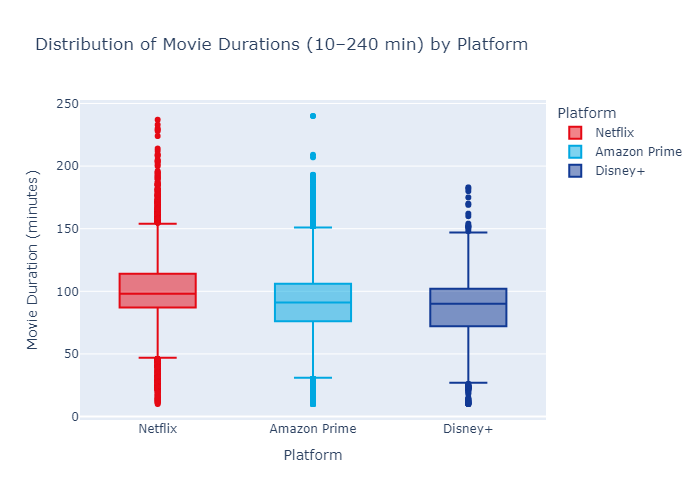

In [9]:
# Visualization 6.1: Movie Durations by Platform

if not df_all.empty and 'platform' in df_all.columns and 'type' in df_all.columns and 'duration_numeric' in df_all.columns:
    # Filter only movie entries with valid durations
    df_movies_only = df_all[
        (df_all['type'] == 'Movie') & (df_all['duration_numeric'].notna())
    ].copy()

    # Remove outliers for clean visualization (10–240 mins)
    df_movies_only_filtered = df_movies_only[
        (df_movies_only['duration_numeric'] >= 10) &
        (df_movies_only['duration_numeric'] <= 240)
    ]

    # Create box plot
    fig_movie_duration = px.box(
        df_movies_only_filtered,
        x='platform',
        y='duration_numeric',
        color='platform',
        title='Distribution of Movie Durations (10–240 min) by Platform',
        labels={
            'duration_numeric': 'Duration (minutes)',
            'platform': 'Platform'
        },
        color_discrete_map=platform_colors
    )

    fig_movie_duration.update_layout(
        yaxis_title='Movie Duration (minutes)'
    )

    # Save and embed for GitHub
    fig_movie_duration.write_image("../04_Visualisations/review_2_charts/movie_duration_boxplot.png")
    display(Image("../04_Visualisations/review_2_charts/movie_duration_boxplot.png"))

else:
    print("Skipping Visualization 6.1: Dataframe is empty or required columns for movie duration analysis are missing.")


**🎬 Interpretation 6.1: Movie Durations**

* The **box plots** above illustrate the distribution of movie durations (in minutes) for Netflix, Amazon Prime Video, and Disney+.
* Across all platforms, the **median duration** aligns closely with the industry-standard feature length of **90 to 120 minutes**.
* **Netflix** and **Amazon Prime Video** demonstrate a **wider interquartile range (IQR)**, suggesting a diverse movie portfolio — from short indie films to extended runtime productions.
  * Netflix’s variability may stem from its focus on global originals, documentaries, and genre experimentation.
  * Amazon Prime frequently hosts a large collection of third-party films with varied lengths.
* In contrast, **Disney+** shows a **tighter, more consistent duration range**, reflecting its reliance on highly produced, brand-driven content (e.g., Disney Animation, Marvel, Pixar).
* **Outliers** on the lower end (<40 minutes) might include short films or children’s specials, while upper-end outliers (>150 minutes) could be extended cuts or epic documentaries.
* This analysis reveals that while **Netflix and Prime cater to a broad spectrum of tastes**, **Disney+ maintains tight control over its content format and duration**, consistent with its family-friendly, blockbuster-oriented brand identity.


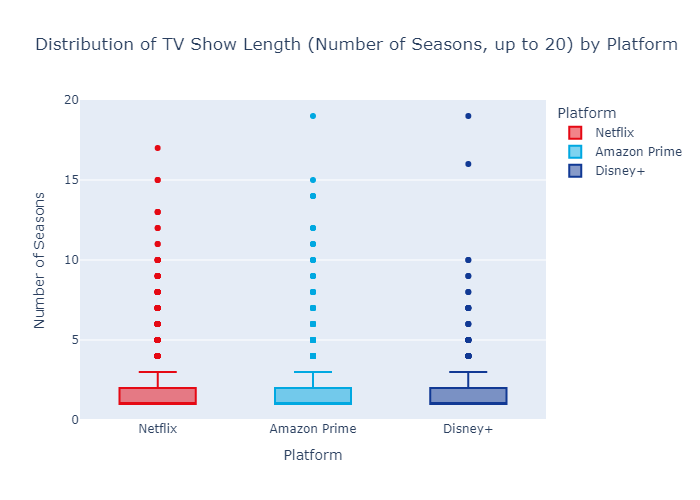

In [10]:
# Visualization 6.2: TV Show Length (Number of Seasons) by Platform

if not df_all.empty and 'platform' in df_all.columns and 'type' in df_all.columns and 'duration_numeric' in df_all.columns:
    df_tv_only = df_all[(df_all['type'] == 'TV Show') & (df_all['duration_numeric'].notna())].copy()
    
    # Filter for reasonable number of seasons (<= 20)
    df_tv_only_filtered = df_tv_only[df_tv_only['duration_numeric'] <= 20]

    # Create box plot
    fig_tv_seasons = px.box(
        df_tv_only_filtered,
        x='platform',
        y='duration_numeric',
        color='platform',
        title='Distribution of TV Show Length (Number of Seasons, up to 20) by Platform',
        labels={
            'duration_numeric': 'Number of Seasons',
            'platform': 'Platform'
        },
        color_discrete_map=platform_colors
    )

    fig_tv_seasons.update_layout(
        yaxis_title='Number of Seasons'
    )

    # Save and embed the image
    fig_tv_seasons.write_image("../04_Visualisations/review_2_charts/tv_show_season_distribution.png")
    display(Image("../04_Visualisations/review_2_charts/tv_show_season_distribution.png"))

else:
    print("Skipping Visualization 6.2: Dataframe is empty or required columns for TV show season analysis are missing.")


**📺 Interpretation 6.2: TV Show Length (Seasons)**

* These box plots display the distribution of TV show lengths across platforms, measured by the number of seasons.
* A large portion of TV shows across all platforms fall within the **1–3 seasons** range — reflecting the popularity of **limited series**, **mini-series**, and recently launched originals.
* **Netflix** and **Amazon Prime Video** show a **wider spread**, featuring both original short-run series and **long-running licensed titles** (e.g., popular sitcoms, crime dramas).
* **Disney+**, while also having some legacy multi-season Disney Channel content, shows a **tighter distribution**. This aligns with its strategy of producing **high-budget limited series** tied to major franchises (Marvel, Star Wars, etc.).
* The **low median season count** across platforms highlights the industry's shift toward **high-impact, short-format storytelling**, allowing platforms to experiment with new IPs and respond quickly to audience engagement.


# ---
## 7. Geographic Focus: Content Origin

Where does the content on these platforms primarily come from? This looks at the `primary_country` of production.


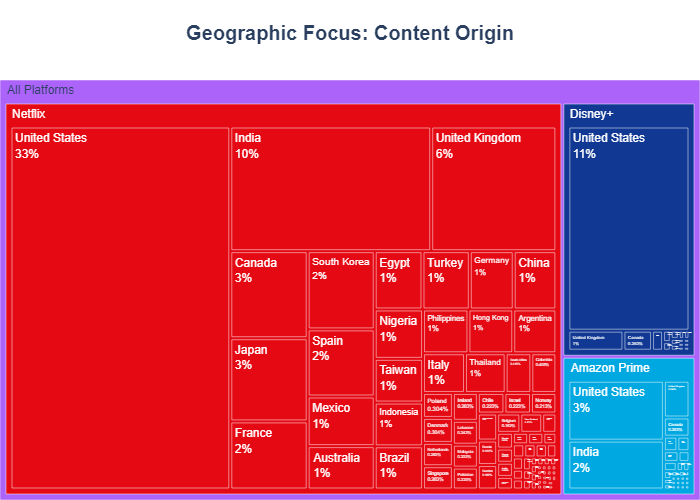

In [11]:
if not df_all.empty:
    # Exclude 'Unknown' and aggregate top countries.
    df_countries = df_all[df_all['primary_country'].notna() & (df_all['primary_country'] != 'Unknown')]
    country_counts = df_countries.groupby(['platform', 'primary_country']).size().reset_index(name='count')

    fig = px.treemap(country_counts,
                     path=[px.Constant("All Platforms"), 'platform', 'primary_country'],
                     values='count',
                     color='platform',
                     color_discrete_map=platform_colors,
                     title='<b>Geographic Focus: Content Origin</b>',
                     hover_data={'count': ':,d'})

    fig.update_layout(
        title_font_size=20,
        title_x=0.5,
        font=dict(family="Arial, sans-serif"),
        margin=dict(t=80, l=0, r=0, b=0)
    )
    fig.update_traces(textinfo='label+percent root',
                      marker_line_width=0.5, marker_line_color="white")
    fig.write_image("../04_Visualisations/review_2_charts/country_plot.png")  # Save as PNG
    display(Image("../04_Visualisations/review_2_charts/country_plot.png"))


# **Interpretation 7.1: Geographic Focus of Content Production**

* These charts display the top countries of origin for content on each platform.
* **United States** is typically the dominant country of production for all three platforms, reflecting Hollywood's global influence.
* **Netflix** often shows a strong international presence, with significant content from countries like India, UK, Canada, Spain, South Korea, etc., due to its global original production strategy.
* **Amazon Prime Video** also has a mix, with US content leading, but also featuring content from India (especially for Prime Video India), UK, and other European countries.
* **Disney+** content is heavily US-centric due to its core American IPs (Disney, Pixar, Marvel, Lucasfilm). While it produces some local content in international markets, its main library is predominantly from the US.
* This highlights Netflix's strong global content strategy versus Disney's more centralized US-focused approach for its main brands. Amazon falls somewhere in between, with regional variations.


# ---
## 8. Conclusion: The Battle of the Binge – Platform Strategies

Based on the visualizations and interpretations above, we can draw several conclusions about the content strategies of Netflix, Amazon Prime Video, and Disney+ in their "Battle of the Binge":

* **Library Size & Mix:**
    * Amazon Prime often leads in sheer volume, particularly with a vast movie catalog.
    * Netflix has a massive, balanced library with a strong emphasis on original TV series.
    * Disney+ has a smaller, highly curated library focused on its powerful, family-oriented IP.

* **Genre Specialization:**
    * **Disney+** is the undisputed king of family, animation, and action-adventure tied to its core franchises. Its strategy is deep and narrow.
    * **Netflix** aims for broad appeal with strengths in dramas, comedies, international content, and documentaries. Its strategy is wide and increasingly deep in originals.
    * **Amazon Prime** also offers a wide variety, with notable presence in dramas, comedies, action, and often a good selection of kids' content. It leverages both licensed content and originals.

* **Content Freshness & Vintage:**
    * All platforms aim to provide new, original content.
    * Netflix and Amazon Prime mix recent releases with a broader range of library content.
    * Disney+ uniquely combines brand new originals with a deep archive of timeless classics, giving it a distinct "age" profile.

* **Target Audience (via Ratings):**
    * Disney+ is unequivocally family-focused.
    * Netflix caters to a diverse audience, with a significant amount of content for mature viewers (TV-MA, R).
    * Amazon Prime also targets a broad demographic, including adults, teens, and children.

* **Growth & Content Acquisition:**
    * Netflix and Amazon have shown aggressive library growth over the years.
    * Disney+'s growth started with a large initial drop of its catalog, now supplemented by a steady stream of high-profile originals.

* **Geographic Strategy:**
    * Netflix stands out with its "global-local" strategy, producing and acquiring content from many countries.
    * Amazon Prime also incorporates international content, with strong regional offerings (e.g., India).
    * Disney+ is primarily US-centric in its core content, though it is expanding local productions.

---

### Overall:

The "Battle of the Binge" is not fought on a single front.

* **Netflix** competes by offering something for everyone, constantly refreshing its library with originals from around the world, and pushing boundaries with diverse genres and mature content.
* **Amazon Prime Video** leverages its massive e-commerce ecosystem, offering a vast library as part of its Prime membership, mixing originals with a deep well of licensed content.
* **Disney+** wields the power of its unparalleled brand portfolio and beloved characters, focusing on high-quality, family-friendly entertainment that fosters deep loyalty.

Each platform has carved out a distinct strategic position, catering to different (though sometimes overlapping) audience needs and preferences. The competition continues to drive innovation in content production and delivery.


# ---
## End of Review 2 Notebook

This notebook has provided a visual and interpretative journey through the content strategies of the major OTT platforms. The use of Plotly allows for interactive exploration of the charts, enhancing the data storytelling aspect.

**Final Deliverables for Review 2:**
* This Jupyter Notebook (`02_Data_Visualization_and_Storytelling.ipynb`)
* An exported PDF version of this notebook for submission
* (If applicable) Any saved HTML files for interactive charts if they were explicitly saved or intended for standalone viewing
